<a href="https://colab.research.google.com/github/pavanghai/DS-Unit-1-Sprint-2-Statistics/blob/master/DSPT6U1S2M2_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment_PavneetGhai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [0]:
# TODO - your code!


## Importing Library

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Read DataSet, define Dataframe, Cleaning and views

In [0]:
# Removed "s" from https:// to avoide certificate expired error
dataset_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data")

#dataset is without column headers we need column Headers
column_headers = ['party','handicapped-infants','water-project','budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban','aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free','south-africa']

# header=none, made blank header, names=column_headers, changed the blank to as per column_headers variable, na_value, replaced ? with nun value
voters_df = pd.read_csv(dataset_url, header=None, names=column_headers, na_values='?') 

In [0]:
#Replace N with 0 and Y with 1 and Split dataframe into republican and democrat
voters_df=voters_df.replace({'y': 1, 'n': 0}) # Replaced 'y' with 1 & 'n' with 0 using Dictionary {key:value}
rep_df = voters_df[voters_df['party']=='republican'] # rep_df where party columns values are republican
dem_df = voters_df[voters_df['party']=='democrat'] # dem_df where party columns values are democrat

## View of Dataframe, Size, Shape, Discription

In [4]:
print("Voters :",voters_df.shape, 'Republican : ', rep_df.shape, 'Democrat :', dem_df.shape)
voters_df.head(5)

Voters : (435, 17) Republican :  (168, 17) Democrat : (267, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


##Defining Function to calculate confidence interval

In [0]:
# Define function for Confidence of intervel 
# How to write comments in function refer as help?
def conf_int(data,confi = 0.95): # confi set to default of 0.95
  cal_q=1-((1-confi)/2)
  mean = data.mean()
  z_critical = stats.norm.ppf(q=cal_q)  # Get the z-critical value* used 0.975 as (0.5/2=0.25)
  moe = z_critical * (data.std()/np.sqrt(data.count())) # moe = margin of error

  return (mean-moe, mean, mean+moe)



## workings with dataframe
**Confidence Intervals:**   
Generate and numerically represent 95% confidence interval on Voters, Republican & Democrat

In [6]:
#How to combine this in Function? need help!
votersci_list = []
votersiss_list = []
for issue in voters_df.columns[1:]:
  tup = [conf_int(voters_df[issue])]
  out = list(sum(tup, ())) 
  votersci_list.append(out)
  votersiss_list.append(issue)
    
votersci_df = pd.DataFrame(votersci_list, columns = ['NegConfInterval','Mean', 'PosConfInterval']) 
#need new column for issue
votersci_df.insert(0, "Issues",votersiss_list)
votersci_df.head(20)

,Issues,NegConfInterval,Mean,PosConfInterval
0,handicapped-infants,0.394697,0.442080,0.489464
1,water-project,0.453998,0.503876,0.553754
2,budget,0.549949,0.596698,0.643447
3,physician-fee-freeze,0.370458,0.417453,0.464447
4,el-salvador-aid,0.456889,0.504762,0.552635
5,religious-groups,0.595809,0.641509,0.687210
6,anti-satellite-ban,0.520318,0.567696,0.615074
7,aid-to-contras,0.528874,0.576190,0.623507
8,mx-missile,0.452931,0.501211,0.549491
9,immigration,0.457250,0.504673,0.552095


In [7]:
#How to combine this in Function? need help!
repci_list = []
repiss_list = []
for issue in rep_df.columns[1:]:
  tup = [conf_int(rep_df[issue])]
  out = list(sum(tup, ())) 
  repci_list.append(out)
  repiss_list.append(issue)
    
repci_df = pd.DataFrame(repci_list, columns = ['NegConfInterval','Mean', 'PosConfInterval']) 
#need new column for issue
repci_df.insert(0, "Issues",repiss_list)
repci_df.head(20)

,Issues,NegConfInterval,Mean,PosConfInterval
0,handicapped-infants,0.128096,0.187879,0.247661
1,water-project,0.425937,0.506757,0.587577
2,budget,0.081827,0.134146,0.186466
3,physician-fee-freeze,0.971131,0.987879,1.004626
4,el-salvador-aid,0.918642,0.951515,0.984388
5,religious-groups,0.851329,0.897590,0.943851
6,anti-satellite-ban,0.174701,0.240741,0.306780
7,aid-to-contras,0.096396,0.152866,0.209336
8,mx-missile,0.066298,0.115152,0.164005
9,immigration,0.481561,0.557576,0.633590


In [8]:
#How to combine this in Function? need help!
demci_list = []
demiss_list = []
for issue in dem_df.columns[1:]:
  tup = [conf_int(dem_df[issue])]
  out = list(sum(tup, ())) 
  demci_list.append(out)
  demiss_list.append(issue)
    
demci_df = pd.DataFrame(demci_list, columns = ['NegConfInterval','Mean', 'PosConfInterval']) 
#need new column for issue
demci_df.insert(0, "Issues",demiss_list)
demci_df.head(20)

,Issues,NegConfInterval,Mean,PosConfInterval
0,handicapped-infants,0.544876,0.604651,0.664427
1,water-project,0.438570,0.502092,0.565614
2,budget,0.850124,0.888462,0.926800
3,physician-fee-freeze,0.026462,0.054054,0.081646
4,el-salvador-aid,0.165105,0.215686,0.266267
5,religious-groups,0.415681,0.476744,0.537808
6,anti-satellite-ban,0.721023,0.772201,0.823378
7,aid-to-contras,0.783296,0.828897,0.874499
8,mx-missile,0.704657,0.758065,0.811472
9,immigration,0.411038,0.471483,0.531928


**Confidence Intervals:**  
Graphically (with a plot) represent the confidence interval

(0.45399769762637865, 0.5038759689922481, 0.5537542403581175)


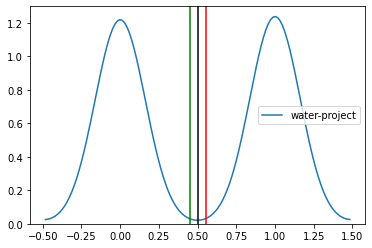

In [9]:
sns.kdeplot(voters_df['water-project'])
CI = conf_int(voters_df['water-project'])
plt.axvline(x=CI[0], color='green')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red')
print(CI)

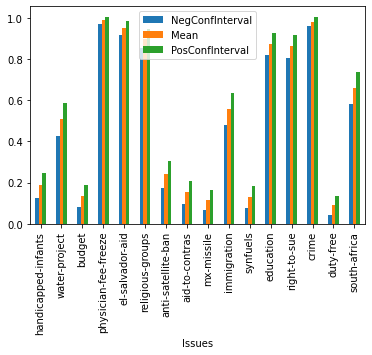

In [10]:
# need Help! unable to wind ways to add mame at the bottom of chart, dont want the index value
repci_df.set_index('Issues', inplace=True)
repci_df.plot.bar()

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)

## Rough Work
Ignore this part

In [11]:
rwlist = np.random.binomial(n=1, p=.5, size=20)
rwlist

array([0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0])

In [12]:
rwlist1=pd.Series(rwlist)
rwlist1.describe()

count    20.000000
mean      0.600000
std       0.502625
min       0.000000
25%       0.000000
50%       1.000000
75%       1.000000
max       1.000000
dtype: float64

In [13]:
rwlc, rwlm, rwls = rwlist1.count(), rwlist1.mean(), rwlist1.std()
print(rwlc, rwlm, rwls)

20 0.6 0.5026246899500346


In [14]:
conf_int(rwlist1, 0.95)

(0.3797190649042395, 0.6, 0.8202809350957605)

In [15]:
print ("budget :", conf_int(voters_df['budget']))
print ("water-project :", conf_int(voters_df['water-project']))
print ("crime :", conf_int(voters_df['crime']))

budget : (0.5499493240661233, 0.5966981132075472, 0.6434469023489711)
water-project : (0.45399769762637865, 0.5038759689922481, 0.5537542403581175)
crime : (0.5461544333005214, 0.5933014354066986, 0.6404484375128757)


In [16]:
conf_int(voters_df.education)

(0.37502922395035654, 0.42326732673267325, 0.47150542951498997)

(0.3797190649042395, 0.6, 0.8202809350957605)


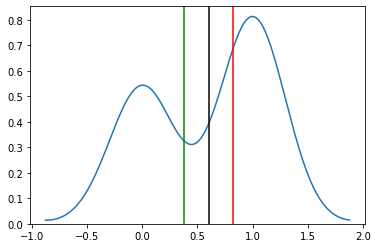

In [17]:
sns.kdeplot(rwlist1)
CI = conf_int(rwlist1)
plt.axvline(x=CI[0], color='green')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red')
print(CI)

(0.3797190649042395, 0.6, 0.8202809350957605)


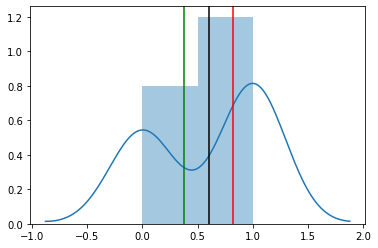

In [18]:
sns.distplot(rwlist1)
CI = conf_int(rwlist1)
plt.axvline(x=CI[0], color='green')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red')
print(CI)

(0.45399769762637865, 0.5038759689922481, 0.5537542403581175)


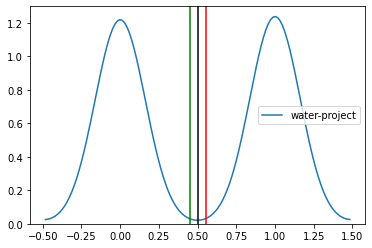

In [19]:
sns.kdeplot(voters_df['water-project'])
CI = conf_int(voters_df['water-project'])
plt.axvline(x=CI[0], color='green')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red')
print(CI)

(0.5499493240661233, 0.5966981132075472, 0.6434469023489711)


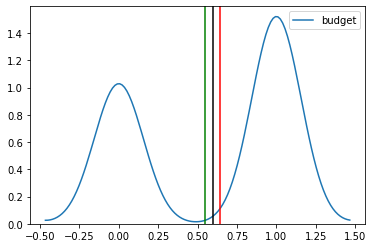

In [20]:
sns.kdeplot(voters_df['budget'])
CI = conf_int(voters_df['budget'])
plt.axvline(x=CI[0], color='green')
plt.axvline(x=CI[1], color='black')
plt.axvline(x=CI[2], color='red')
print(CI)

In [21]:
o=0.95
a=1-((1-o)/2)
a

0.975

In [22]:
o=0.95
a=1-o
a=a/2
o+a


0.975

In [23]:
z_critical = stats.norm.ppf(q = 0.025)  # Get the z-critical value* used 0.975 as (0.5/2=0.25)
margin_of_error = z_critical * (rwls/np.sqrt(rwlc))
pci = rwlm + margin_of_error
nci = rwlm - margin_of_error
print(z_critical, margin_of_error, pci,rwlm, nci)

-1.9599639845400545 -0.22028093509576052 0.37971906490423946 0.6 0.8202809350957605


In [24]:
z_critical = stats.norm.ppf(q = 0.975)  # Get the z-critical value* used 0.975 as (0.5/2=0.25)
margin_of_error = z_critical * (rwls/np.sqrt(rwlc))
pci = rwlm + margin_of_error
nci = rwlm - margin_of_error
print(z_critical, margin_of_error, pci,rwlm, nci)

1.959963984540054 0.22028093509576047 0.8202809350957605 0.6 0.3797190649042395


https://www.simplypsychology.org/ci-for-the-mean-formula.png?ezimgfmt=rs:316x172/rscb13/ng:webp/ngcb13

In [25]:
# column_names = ["a", "b", "c"]

t_df = pd.DataFrame(columns = ['issues', 'NegConfidence Interval','Mean', 'PosConfidence Interval'])

t_df

,issues,NegConfidence Interval,Mean,PosConfidence Interval


In [26]:
t1_df = voters_df.columns[1:].T
t1_df

Index(['handicapped-infants', 'water-project', 'budget',
       'physician-fee-freeze', 'el-salvador-aid', 'religious-groups',
       'anti-satellite-ban', 'aid-to-contras', 'mx-missile', 'immigration',
       'synfuels', 'education', 'right-to-sue', 'crime', 'duty-free',
       'south-africa'],
      dtype='object')

In [27]:
#Making Dataframe from the values received
# votersCI_df = pd.DataFrame(columns = ['issues', 'NegConfidence Interval','Mean', 'PosConfidence Interval'])
for issue in voters_df.columns[1:]:
  print([issue], pd.DataFrame(conf_int(voters_df[issue])).T)
# test_df = pd.DataFrame(conf_int(voters_df['education'])).T
# test_df

['handicapped-infants']           0        1         2
0  0.394697  0.44208  0.489464
['water-project']           0         1         2
0  0.453998  0.503876  0.553754
['budget']           0         1         2
0  0.549949  0.596698  0.643447
['physician-fee-freeze']           0         1         2
0  0.370458  0.417453  0.464447
['el-salvador-aid']           0         1         2
0  0.456889  0.504762  0.552635
['religious-groups']           0         1        2
0  0.595809  0.641509  0.68721
['anti-satellite-ban']           0         1         2
0  0.520318  0.567696  0.615074
['aid-to-contras']           0        1         2
0  0.528874  0.57619  0.623507
['mx-missile']           0         1         2
0  0.452931  0.501211  0.549491
['immigration']          0         1         2
0  0.45725  0.504673  0.552095
['synfuels']           0         1         2
0  0.315961  0.362319  0.408676
['education']           0         1         2
0  0.375029  0.423267  0.471505
['right-to-sue']     

In [28]:
#Making Dataframe from the values received
votersci_df = []
votersiss_list = []
for issue in voters_df.columns[1:]:
  tup = [conf_int(voters_df[issue])]
  out = list(sum(tup, ())) 
  votersci_df.append(out)
  votersiss_list.append(issue)
    
votersci_df = pd.DataFrame(votersci_df, columns = ['NegConfInterval','Mean', 'PosConfInterval']) 
#need new column for issue
testci_df.insert(0, "Issues",votersiss_list)
testci_df.head(20)

NameError: ignored

In [0]:
column_headers [1:]

In [0]:
x= conf_int (rwlist1)
print (x)

In [0]:
# Define function for Confidence of intervel 
# How to write comments in function refer as help?

def conf_int(data,confi = 0.95): # confi set to default of 0.95
  cal_q=1-((1-confi)/2)
  mean = data.mean()
  z_critical = stats.norm.ppf(q=cal_q)  # Get the z-critical value* used 0.975 as (0.5/2=0.25)
  moe = z_critical * (data.std()/np.sqrt(data.count())) # moe = margin of error
  ncimoe = mean-moe
  pcimoe = mean+moe
  return (ncimoe, mean, pcimoe)

# def forloop ()
#   # doing this to run loop to add all as DF
#   ci_list = []
#   iss_list = []
#   for issue in data.columns[1:]:
#     tup = [conf_int(data[issue])]
#     out = list(sum(tup, ())) 
#     ci_list.append(out)
#     iss_list.append(issue)
    
#   ci_df = pd.DataFrame(ci_list, columns = ['NegConfInterval','Mean', 'PosConfInterval']) 
#   #need new column for issue
#   ci_df.insert(0, "Issues",votersiss_list)
  
#   return (mean-moe, mean, mean+moe)

In [0]:
votersci_df = []
votersiss_list = []
for issue in voters_df.columns[1:]:
  tup = [conf_int(voters_df[issue])]
  out = list(sum(tup, ())) 
  votersci_df.append(out)
  votersiss_list.append(issue)
    
votersci_df = pd.DataFrame(votersci_df, columns = ['NegConfInterval','Mean', 'PosConfInterval']) 
#need new column for issue
votersci_df.insert(0, "Issues",votersiss_list)
votersci_df.head(20)

In [0]:
testing = conf_int(voters_df)
type(testing)

In [0]:
#Making Dataframe from the values received
votersci_df = []
votersiss_list = []
for issue in voters_df.columns[1:]:
  tup = [conf_int(voters_df[issue])]
  out = list(sum(tup, ())) 
  votersci_df.append(out)
  votersiss_list.append(issue)
    
votersci_df = pd.DataFrame(votersci_df, columns = ['NegConfInterval','Mean', 'PosConfInterval']) 
#need new column for issue
testci_df.insert(0, "Issues",votersiss_list)
testci_df.head(20)

In [0]:
x=[1,2,3,4,5,6,7]
y=[50,51,52,48,47,49,46]

In [0]:
plt.xlabel('Day')
plt.ylabel('Temperature')
plt.title('Weather')
plt.plot(x,y,color='red', linewidth=2, linestyle='--')

In [0]:
repci_df.head()

In [0]:
repci_df.shape

In [0]:
# xlist= repci_df['Issues']
# ylist = repci_df['NegConfInterval', 'Mean',	'PosConfInterval']
repci_df.set_index('Issues', inplace=True)
repci_df.plot.bar()